In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib.colors as mcolors
import json
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [5]:
# Obtener la fecha y hora actual
now = datetime.datetime.now()

In [6]:
#Formatear las fechas en el formato ISO8601 con zona horaria UTC
endtime = now.strftime("%Y-%m-%dT%H:%M:%S+00:00")
starttime = "2012-01-01T00:00:00+00:00"

In [7]:
# Definir los parámetros de consulta para cada país
chile_params = {
    "format": "geojson",
    "starttime": starttime,
    "endtime": endtime,
    "minlatitude": -56.8,
    "maxlatitude": -19.0,
    "minlongitude": -79.0,
    "maxlongitude": -69.9,
    "jsonerror": "true",
    "orderby": "time"
}

japan_params = {
    "format": "geojson",
    "starttime": starttime,
    "endtime": endtime,
    "minlatitude": 27.0,
    "maxlatitude": 44.0,
    "minlongitude": 132.78,
    "maxlongitude": 145.53,
    "jsonerror": "true",
    "orderby": "time"
}

usa_params = {
    "format": "geojson",
    "starttime": starttime,
    "endtime": endtime,
    "maxlatitude": 50,
    "minlatitude": 24.6,
    "maxlongitude": -65,
    "minlongitude": -125,
    "jsonerror": "true",
    "orderby": "time"
}

In [8]:
# Realizar las solicitudes a la API y guardar los datos en archivos GeoJSON
urls_params = [
    ("https://earthquake.usgs.gov/fdsnws/event/1/query", chile_params, "chile_earthquake_data_now.geojson"),
    ("https://earthquake.usgs.gov/fdsnws/event/1/query", japan_params, "japan_earthquake_data_now.geojson"),
    ("https://earthquake.usgs.gov/fdsnws/event/1/query", usa_params, "usa_earthquake_data_now.geojson")
]

for url, params, filename in urls_params:
    response = requests.get(url, params=params)

    if response.status_code == 200:
        # Si la solicitud fue exitosa, guardamos la respuesta en un archivo GeoJSON
        data = response.json()
        with open(filename, "w") as file:
            json.dump(data, file)
        print(f"Archivo GeoJSON de {filename.split('_')[0].capitalize()} descargado exitosamente.")
    else:
        print(f"Error al realizar la solicitud de {filename.split('_')[0].capitalize()}: {response.status_code}")


Archivo GeoJSON de Chile descargado exitosamente.
Archivo GeoJSON de Japan descargado exitosamente.
Archivo GeoJSON de Usa descargado exitosamente.


In [9]:
# Para ETL previo obtenemos los datos dentro de archivos .csv
# Juntamos los requests para obtener los datos de los tres paises que nos interesan a traves de la API

chile_url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
chile_params = {
    "format": "csv",
    "starttime": starttime,
    "endtime": endtime,
    "minlatitude": -56.8,
    "maxlatitude": -19.0,
    "minlongitude": -79.0,
    "maxlongitude": -69.9,
    "jsonerror": "true",
    "orderby": "time-asc"
}

chile_response = requests.get(chile_url, params=chile_params)

if chile_response.status_code == 200:
    # Si la solicitud fue exitosa, guardamos la respuesta en un archivo CSV
    with open("chile_earthquake_data.csv", "w") as chile_file:
        chile_file.write(chile_response.text)
    print("Archivo CSV de Chile descargado exitosamente.")
else:
    print("Error al realizar la solicitud de Chile:", chile_response.status_code)

japan_url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
japan_params = {
    "format": "csv",
    "starttime": starttime,
    "endtime": endtime,
    "minlatitude": 27.0,
    "maxlatitude": 44.0,
    "minlongitude": 132.78,
    "maxlongitude": 145.53,
    "jsonerror": "true",
    "orderby": "time-asc"
}

japan_response = requests.get(japan_url, params=japan_params)

if japan_response.status_code == 200:
    # Si la solicitud fue exitosa, guardamos la respuesta en un archivo CSV
    with open("japan_earthquake_data.csv", "w", encoding="utf-8") as japan_file:
        japan_file.write(japan_response.text)
    print("Archivo CSV de Japón descargado exitosamente.")
else:
    print("Error al realizar la solicitud de Japón:", japan_response.status_code)


usa_url = "https://earthquake.usgs.gov/fdsnws/event/1/query"
usa_params = {
    "format": "csv",
    "starttime": starttime,
    "endtime": endtime,
    "maxlatitude": 50,
    "minlatitude": 24.6,
    "maxlongitude": -65,
    "minlongitude": -125,
    "minmagnitude": 3,
    "orderby": "time-asc"
}

usa_response = requests.get(usa_url, params=usa_params)

if usa_response.status_code == 200:
    # Si la solicitud fue exitosa, guardamos la respuesta en un archivo CSV
    with open("usa_earthquake_data.csv", "w") as usa_file:
        usa_file.write(usa_response.text)
    print("Archivo CSV de Estados Unidos descargado exitosamente.")
else:
    print("Error al realizar la solicitud de Estados Unidos:", usa_response.status_code)

Archivo CSV de Chile descargado exitosamente.
Archivo CSV de Japón descargado exitosamente.
Archivo CSV de Estados Unidos descargado exitosamente.


In [10]:
# Leer los archivos CSV y asignar el nombre del país a cada DataFrame
df_chile = pd.read_csv('chile_earthquake_data.csv', encoding='latin-1')
df_chile['Country'] = 'Chile'

df_japan = pd.read_csv('japan_earthquake_data.csv', encoding='utf-8')
df_japan['Country'] = 'Japan'

df_usa = pd.read_csv('usa_earthquake_data.csv', encoding='latin-1')
df_usa['Country'] = 'USA'

In [18]:
df_usa

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Country
0,2012-01-02T21:11:29.890Z,31.695667,-115.943833,8.626000,3.00,ml,8.0,139.00,0.637300,0.1600,...,"59km E of Maneadero, B.C., MX",earthquake,0.620000,31.610000,0.156,83.0,reviewed,ci,ci,USA
1,2012-01-03T10:56:58.000Z,35.536000,-96.750000,3.600000,3.40,ml,49.0,36.30,NaN,NaN,...,"8 km NW of Prague, Oklahoma",earthquake,NaN,NaN,NaN,NaN,reviewed,tul,tul,USA
2,2012-01-03T14:18:56.110Z,33.194667,-119.449167,18.022000,4.14,ml,14.0,206.00,NaN,0.2900,...,"7km SE of San Nicolas Is., CA",earthquake,1.100000,0.850000,0.126,28.0,reviewed,ci,ci,USA
3,2012-01-04T20:59:56.500Z,43.668000,-105.197000,0.000000,3.30,ml,17.0,76.90,NaN,1.2900,...,"25 km ESE of Wright, Wyoming",explosion,NaN,NaN,NaN,NaN,reviewed,us,us,USA
4,2012-01-05T07:20:10.160Z,42.548000,-111.213000,5.000000,3.40,ml,108.0,44.00,NaN,0.9200,...,"14 km ENE of Georgetown, Idaho",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13585,2023-07-03T22:13:31.850Z,31.863098,-101.797709,9.072713,3.00,ml,26.0,61.00,0.083187,0.1000,...,"29 km S of Stanton, Texas",earthquake,0.730393,0.937463,0.100,13.0,reviewed,tx,tx,USA
13586,2023-07-04T14:58:49.570Z,40.389833,-124.409500,29.860000,3.88,mw,38.0,223.00,0.101800,0.1600,...,"13km NW of Petrolia, CA",earthquake,0.700000,0.450000,NaN,4.0,reviewed,nc,nc,USA
13587,2023-07-05T02:16:55.574Z,38.541600,-118.153600,10.000000,3.40,ml,11.0,38.81,0.367000,0.1733,...,"17 km NNW of Mina, Nevada",earthquake,NaN,1.400000,0.350,6.0,reviewed,nn,nn,USA
13588,2023-07-05T09:21:20.940Z,40.231500,-121.157167,5.250000,3.50,mw,48.0,28.00,0.018520,0.2600,...,"2km NE of Almanor, CA",earthquake,0.370000,0.790000,NaN,5.0,reviewed,nc,nc,USA


In [15]:
# Mostrar los valores únicos en una columna específica
columna_unica = df_usa['type'].unique()
print(columna_unica)

['earthquake' 'explosion' 'rock burst' 'mining explosion' 'mine collapse'
 'experimental explosion' 'quarry blast']


In [20]:
valores_a_borrar = ['explosion', 'rock burst', 'mining explosion', 'mine collapse', 'experimental explosion', 'quarry blast']
df_usa = df_usa.drop(df_usa[df_usa['type'].isin(valores_a_borrar)].index)

In [21]:
df_usa

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Country
0,2012-01-02T21:11:29.890Z,31.695667,-115.943833,8.626000,3.00,ml,8.0,139.00,0.637300,0.1600,...,"59km E of Maneadero, B.C., MX",earthquake,0.620000,31.610000,0.156,83.0,reviewed,ci,ci,USA
1,2012-01-03T10:56:58.000Z,35.536000,-96.750000,3.600000,3.40,ml,49.0,36.30,NaN,NaN,...,"8 km NW of Prague, Oklahoma",earthquake,NaN,NaN,NaN,NaN,reviewed,tul,tul,USA
2,2012-01-03T14:18:56.110Z,33.194667,-119.449167,18.022000,4.14,ml,14.0,206.00,NaN,0.2900,...,"7km SE of San Nicolas Is., CA",earthquake,1.100000,0.850000,0.126,28.0,reviewed,ci,ci,USA
4,2012-01-05T07:20:10.160Z,42.548000,-111.213000,5.000000,3.40,ml,108.0,44.00,NaN,0.9200,...,"14 km ENE of Georgetown, Idaho",earthquake,NaN,NaN,NaN,NaN,reviewed,us,us,USA
7,2012-01-06T02:47:51.070Z,34.002000,-116.337167,4.362000,3.08,ml,80.0,24.00,0.080170,0.2100,...,"15km S of Joshua Tree, CA",earthquake,0.210000,0.490000,0.147,166.0,reviewed,ci,ci,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13585,2023-07-03T22:13:31.850Z,31.863098,-101.797709,9.072713,3.00,ml,26.0,61.00,0.083187,0.1000,...,"29 km S of Stanton, Texas",earthquake,0.730393,0.937463,0.100,13.0,reviewed,tx,tx,USA
13586,2023-07-04T14:58:49.570Z,40.389833,-124.409500,29.860000,3.88,mw,38.0,223.00,0.101800,0.1600,...,"13km NW of Petrolia, CA",earthquake,0.700000,0.450000,NaN,4.0,reviewed,nc,nc,USA
13587,2023-07-05T02:16:55.574Z,38.541600,-118.153600,10.000000,3.40,ml,11.0,38.81,0.367000,0.1733,...,"17 km NNW of Mina, Nevada",earthquake,NaN,1.400000,0.350,6.0,reviewed,nn,nn,USA
13588,2023-07-05T09:21:20.940Z,40.231500,-121.157167,5.250000,3.50,mw,48.0,28.00,0.018520,0.2600,...,"2km NE of Almanor, CA",earthquake,0.370000,0.790000,NaN,5.0,reviewed,nc,nc,USA


In [22]:
df_chile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             5824 non-null   object 
 1   latitude         5824 non-null   float64
 2   longitude        5824 non-null   float64
 3   depth            5824 non-null   float64
 4   mag              5824 non-null   float64
 5   magType          5824 non-null   object 
 6   nst              807 non-null    float64
 7   gap              5203 non-null   float64
 8   dmin             4757 non-null   float64
 9   rms              5533 non-null   float64
 10  net              5824 non-null   object 
 11  id               5824 non-null   object 
 12  updated          5824 non-null   object 
 13  place            5816 non-null   object 
 14  type             5824 non-null   object 
 15  horizontalError  4382 non-null   float64
 16  depthError       5484 non-null   float64
 17  magError      

In [23]:
df_japan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8908 entries, 0 to 8907
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             8908 non-null   object 
 1   latitude         8908 non-null   float64
 2   longitude        8908 non-null   float64
 3   depth            8908 non-null   float64
 4   mag              8908 non-null   float64
 5   magType          8908 non-null   object 
 6   nst              2522 non-null   float64
 7   gap              8908 non-null   float64
 8   dmin             7356 non-null   float64
 9   rms              8908 non-null   float64
 10  net              8908 non-null   object 
 11  id               8908 non-null   object 
 12  updated          8908 non-null   object 
 13  place            8826 non-null   object 
 14  type             8908 non-null   object 
 15  horizontalError  6424 non-null   float64
 16  depthError       8471 non-null   float64
 17  magError      

In [24]:
df_usa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11723 entries, 0 to 13589
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             11723 non-null  object 
 1   latitude         11723 non-null  float64
 2   longitude        11723 non-null  float64
 3   depth            11723 non-null  float64
 4   mag              11723 non-null  float64
 5   magType          11722 non-null  object 
 6   nst              7114 non-null   float64
 7   gap              11349 non-null  float64
 8   dmin             8776 non-null   float64
 9   rms              11573 non-null  float64
 10  net              11723 non-null  object 
 11  id               11723 non-null  object 
 12  updated          11723 non-null  object 
 13  place            11710 non-null  object 
 14  type             11723 non-null  object 
 15  horizontalError  9560 non-null   float64
 16  depthError       11475 non-null  float64
 17  magError    

In [25]:
# Definir el diccionario de mapeo de nombres de columnas
nombres_columnas = {
    'time': 'dt_sismo',
    'depth':'profundidad',
    'magType': 'tipo_magnitud',
    'updated': 'dt_actualizacion',
    'place': 'ubicacion',
    'type': 'tipo',
    'horizontalError': 'error_horizontal',
    'depthError': 'error_profundidad',
    'magError': 'error_magnitud',
    'status': 'estado',
    'locationSource': 'fuente_localizacion',
    'magSource': 'fuente_mag',
    'Country': 'pais'
}


In [26]:
# Renombrar las columnas del DataFrame
df_chile = df_chile.rename(columns=nombres_columnas)
df_japan = df_japan.rename(columns=nombres_columnas)
df_usa = df_usa.rename(columns=nombres_columnas)

# Convertir la columna 'dt_sismo' en un objeto datetime
df_chile['dt_sismo'] = pd.to_datetime(df_chile['dt_sismo'])
df_japan['dt_sismo'] = pd.to_datetime(df_japan['dt_sismo'])
df_usa['dt_sismo'] = pd.to_datetime(df_usa['dt_sismo'])

# Extraer la fecha de la columna 'dt_sismo'
df_chile['fecha_sismo'] = df_chile['dt_sismo'].dt.strftime('%Y-%m-%d')
df_japan['fecha_sismo'] = df_japan['dt_sismo'].dt.strftime('%Y-%m-%d')
df_usa['fecha_sismo'] = df_usa['dt_sismo'].dt.strftime('%Y-%m-%d')

# Extraer hora de la columna 'dt_sismo'
df_chile['hora_sismo'] = pd.to_datetime(df_chile['dt_sismo'], format='%H:%M:%S').dt.time
df_japan['hora_sismo'] = pd.to_datetime(df_japan['dt_sismo'], format='%H:%M:%S').dt.time
df_usa['hora_sismo'] = pd.to_datetime(df_usa['dt_sismo'], format='%H:%M:%S').dt.time

# Obtener la lista de columnas del DataFrame
columnas_chile = df_chile.columns.tolist()
columnas_japan = df_japan.columns.tolist()
columnas_usa = df_usa.columns.tolist()

In [27]:
# Mover las columnas 'fecha_sismo' y 'hora_sismo'
columnas_chile.remove('fecha_sismo')
columnas_japan.remove('fecha_sismo')
columnas_usa.remove('fecha_sismo')

columnas_chile.remove('hora_sismo')
columnas_japan.remove('hora_sismo')
columnas_usa.remove('hora_sismo')

columnas_chile.insert(1, 'fecha_sismo')
columnas_japan.insert(1, 'fecha_sismo')
columnas_usa.insert(1, 'fecha_sismo')

columnas_chile.insert(2, 'hora_sismo')
columnas_japan.insert(2, 'hora_sismo')
columnas_usa.insert(2, 'hora_sismo')

# Reindexar los DataFrames con las columnas en el nuevo orden
df_chile = df_chile.reindex(columns=columnas_chile)
df_japan = df_japan.reindex(columns=columnas_japan)
df_usa = df_usa.reindex(columns=columnas_usa)

# Convertir la columna 'dt_actualizacion' en un objeto datetime
df_chile['dt_actualizacion'] = pd.to_datetime(df_chile['dt_actualizacion'])
df_japan['dt_actualizacion'] = pd.to_datetime(df_japan['dt_actualizacion'])
df_usa['dt_actualizacion'] = pd.to_datetime(df_usa['dt_actualizacion'])


# Extraer la fecha de la columna 'dt_actualizacion'
df_chile['fecha_actualizacion'] = df_chile['dt_actualizacion'].dt.strftime('%Y-%m-%d')
df_japan['fecha_actualizacion'] = df_japan['dt_actualizacion'].dt.strftime('%Y-%m-%d')
df_usa['fecha_actualizacion'] = df_usa['dt_actualizacion'].dt.strftime('%Y-%m-%d')


# Extraer hora de la columna 'dt_actualizacion'
df_chile['hora_actualizacion'] = pd.to_datetime(df_chile['dt_actualizacion'], format='%H:%M:%S').dt.time
df_japan['hora_actualizacion'] = pd.to_datetime(df_japan['dt_actualizacion'], format='%H:%M:%S').dt.time
df_usa['hora_actualizacion'] = pd.to_datetime(df_usa['dt_actualizacion'], format='%H:%M:%S').dt.time


# Obtener la lista de columnas del DataFrame
columnas_chile = df_chile.columns.tolist()
columnas_japan = df_japan.columns.tolist()
columnas_usa = df_usa.columns.tolist()

# Mover las columnas 'fecha_sismo' y 'hora_sismo'
columnas_chile.remove('fecha_actualizacion')
columnas_japan.remove('fecha_actualizacion')
columnas_usa.remove('fecha_actualizacion')

columnas_chile.remove('hora_actualizacion')
columnas_japan.remove('hora_actualizacion')
columnas_usa.remove('hora_actualizacion')

columnas_chile.insert(15, 'fecha_actualizacion')
columnas_japan.insert(15, 'fecha_actualizacion')
columnas_usa.insert(15, 'fecha_actualizacion')

columnas_chile.insert(16, 'hora_actualizacion')
columnas_japan.insert(16, 'hora_actualizacion')
columnas_usa.insert(16, 'hora_actualizacion')

# Reindexar el DataFrame con las columnas en el nuevo orden
df_chile = df_chile.reindex(columns=columnas_chile)
df_japan = df_japan.reindex(columns=columnas_japan)
df_usa = df_usa.reindex(columns=columnas_usa)

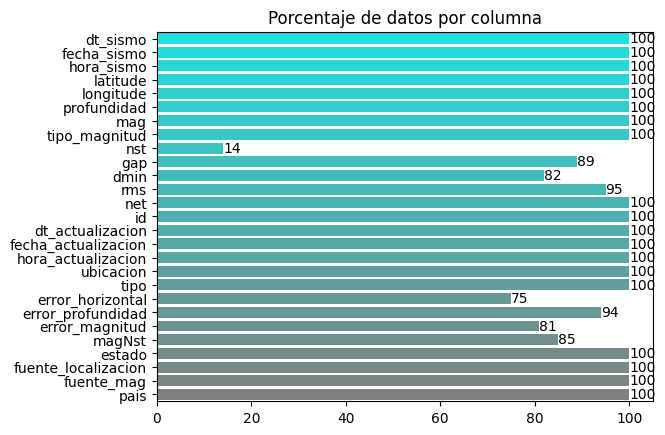

In [28]:
# Mostramos en un gráfico de barras los porcentajes de datos por columna de cada df

# Definimos una función para generar la paleta de colores personalizada
def custom_palette(n, start_color, end_color):
    start_rgb = np.array(mcolors.hex2color(start_color))
    end_rgb = np.array(mcolors.hex2color(end_color))
    colors = [mcolors.rgb2hex(start_rgb + (i * (end_rgb - start_rgb)))
              for i in np.linspace(0, 1, n)]
    return colors

# Definimos los colores de la paleta
start_color = "#00FFFF"  # Verde agua
end_color = "#808080"    # Gris

# Definimos el número de columnas
num_columns = df_chile.shape[1]

# Creamos la paleta de colores personalizada
paleta = custom_palette(num_columns, start_color, end_color)

# Crea el gráfico de barras con los colores personalizados de Chile
ax = sns.barplot(x=(round(df_chile.notnull().sum() * 100 / df_chile.shape[0])).values, y = df_chile.columns, palette=paleta)
ax.bar_label(ax.containers[0])
plt.title('Porcentaje de datos por columna')

# Muestra el gráfico
plt.show()


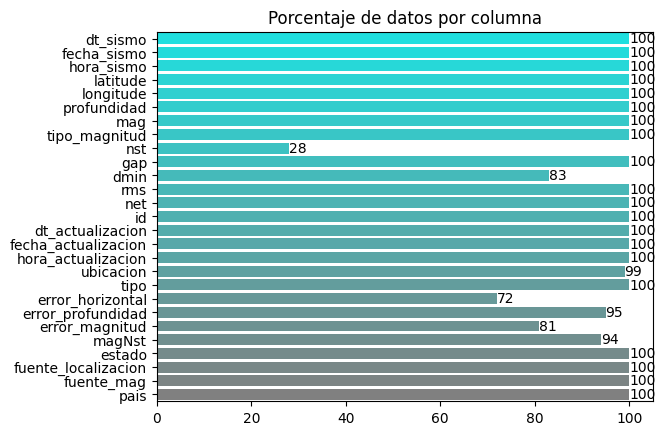

In [29]:
# Crea el gráfico de barras con los colores personalizados de Japón
ax = sns.barplot(x=(round(df_japan.notnull().sum() * 100 / df_japan.shape[0])).values, y = df_japan.columns, palette=paleta)
ax.bar_label(ax.containers[0])
plt.title('Porcentaje de datos por columna')

# Muestra el gráfico
plt.show()

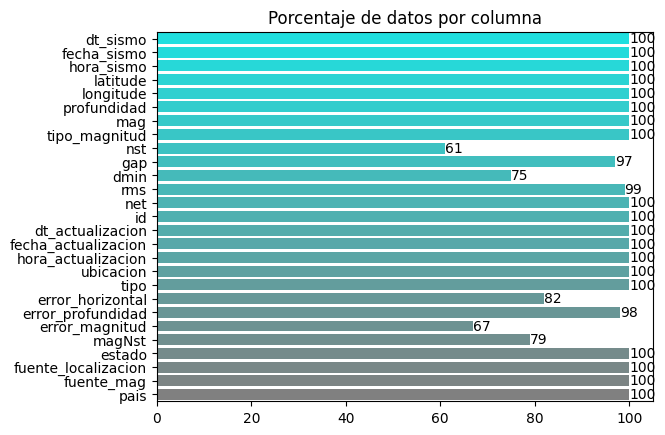

In [30]:
# Crea el gráfico de barras con los colores personalizados de USA
ax = sns.barplot(x=(round(df_usa.notnull().sum() * 100 / df_usa.shape[0])).values, y = df_usa.columns, palette=paleta)
ax.bar_label(ax.containers[0])
plt.title('Porcentaje de datos por columna')

# Muestra el gráfico
plt.show()

In [32]:
#Eliminamos las columnas que no utilizaremos de cada dataframe: tipo_magnitud, nst, gap, dmin, ms, net, id, dt_actualizacion, fecha_actualizacion, hora_actualizacion, ubicacion, tipo, error_horizontal, error_profundidad, error_magnitud, magNst, estado, fuente_localizacion,
#fuente_mag

columnas_eliminar = ['tipo_magnitud', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'dt_actualizacion', 'fecha_actualizacion', 'hora_actualizacion', 'ubicacion', 'tipo', 'error_horizontal', 'error_profundidad', 'error_magnitud', 'magNst', 'estado', 'fuente_localizacion', 'fuente_mag']

df_chile = df_chile.drop(columnas_eliminar, axis=1)
df_japan = df_japan.drop(columnas_eliminar, axis=1)
df_usa = df_usa.drop(columnas_eliminar, axis=1)

KeyError: "['tipo_magnitud', 'nst', 'gap', 'dmin', 'rms', 'net', 'id', 'dt_actualizacion', 'fecha_actualizacion', 'hora_actualizacion', 'ubicacion', 'tipo', 'error_horizontal', 'error_profundidad', 'error_magnitud', 'magNst', 'estado', 'fuente_localizacion', 'fuente_mag'] not found in axis"

In [33]:
# Concatenar los DataFrames en uno solo
df_combined = pd.concat([df_usa, df_japan, df_chile], ignore_index=True)

# Crear una figura de tipo Scattergeo
fig = go.Figure(data=go.Scattergeo(
    lat = df_combined['latitude'],
    lon = df_combined['longitude'],
    mode = 'markers',
    marker = dict(
        size = df_combined['mag']*5,  # Ajustar el tamaño de los puntos
        color = df_combined['mag'],
        colorscale = 'Viridis',
        cmin = df_combined['mag'].min(),
        cmax = df_combined['mag'].max(),
        colorbar_title = 'Magnitud',
        opacity = 0.7  # Ajustar la opacidad de los puntos
    ),
    hovertext = df_combined['pais']
))

# Configurar el tamaño y título del mapa
fig.update_layout(
    title={
        'text': 'Mapa de sismos por magnitud',
        'x': 0.5  # Centrar el título horizontalmente
    },
    height=800,  # Ajustar la altura del mapa
    margin={"r": 0, "t": 30, "l": 0, "b": 0}  # Ajustar los márgenes del mapa
)

# Mostrar el mapa
fig.show()